In [24]:
# Here I have mplemented CNN on the CIFAR-10 dataset. It is a collection of images that are commonly used to train machine
# learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.
# The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent
# airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. 50,000 images for training and 10,000 for test

In [25]:
# import required package
import pandas as pd
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [26]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [27]:
print(X_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [28]:
print(X_test.shape, y_test.shape)

(10000, 32, 32, 3) (10000, 1)


In [48]:
# Output classes
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
# We will follow the general practice of reshape the inputs and hot encoding the outputs
print("Before Reshaping: ", np.min(X_train), np.max(X_train))
X_train1 = X_train.reshape(50000, 32,32, 3).astype("float32")
X_train1 = X_train1/255
print("After Reshaping: ", np.min(X_train1), np.max(X_train1))

Before Reshaping:  0 255
After Reshaping:  0.0 1.0


In [30]:
X_test1 = X_test.reshape(10000, 32,32,3).astype('float32')
X_test1 = X_test1/255
print("After Reshaping: ", np.min(X_test1), np.max(X_test1))

After Reshaping:  0.0 1.0


In [31]:
# Hot Encode Output
from keras.utils import np_utils

In [32]:
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)

(50000, 1) (10000, 1)


In [33]:
# Import required libs for building the CNN model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [34]:
# Build the CNN model
model =  Sequential()
# 1st CNN layer
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(3,3)))
# 2nd CNN layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())

model.add(Dense(1000, activation='relu')) # for 1000 iterations
model.add(Dense(10, activation='softmax')) # for 10 output classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              257000    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [36]:
# Fit data
hist = model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=2, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 144s 3ms/step - loss: 1.5375 - accuracy: 0.4400 - val_loss: 1.3643 - val_accuracy: 0.5046
Epoch 2/2
50000/50000 [==============================] - 151s 3ms/step - loss: 1.1964 - accuracy: 0.5764 - val_loss: 1.1517 - val_accuracy: 0.5969


In [38]:
# check accuracy and loss
print(hist.history['accuracy'])
print(hist.history['loss'])

[0.43998, 0.57644]
[1.5374512828063964, 1.1963616986083985]


In [49]:
# predict
res = np.argmax(model.predict(X_test1[17:18]))
res

7

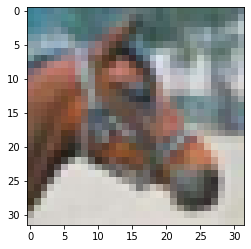

In [41]:
# Check
plt.imshow(X_test[17])

In [42]:
# verify
y_test[17]

array([7])